In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Dataset .csv to Dataset .csv


MOST COMMON CUISINE


Most common cuisine combination: North Indian (936 restaurants)


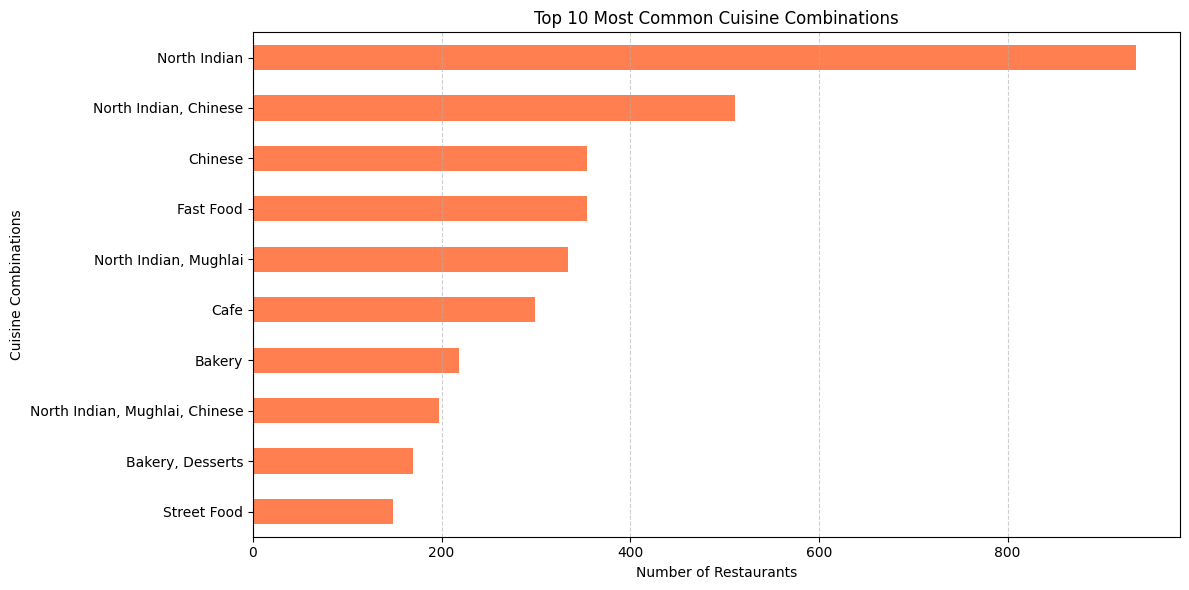

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('Dataset .csv')

# Counting the most common cuisine combinations
cuisine_combinations = df['Cuisines'].value_counts().dropna().head(10)

# Displaying the most common combination
most_common_combination = cuisine_combinations.idxmax()
print(f"Most common cuisine combination: {most_common_combination} ({cuisine_combinations.max()} restaurants)")

# Plot: Top 10 cuisine combinations
plt.figure(figsize=(12, 6))
cuisine_combinations.plot(kind='barh', color='coral')
plt.title('Top 10 Most Common Cuisine Combinations')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Combinations')
plt.gca().invert_yaxis()  # Show highest bar at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


CUSISINE COMBINATIONS

Top 10 Cuisine Combinations by Average Rating (min 10 restaurants):
Cuisines
Modern Indian                 4.345455
Indian                        4.250000
Seafood                       4.114286
Thai                          4.100000
Cafe, Continental, Italian    4.080000
American, Burger              4.076923
Japanese, Sushi               4.044444
Pizza, Italian                3.668421
American                      3.667742
Italian                       3.657407
Name: Aggregate rating, dtype: float64


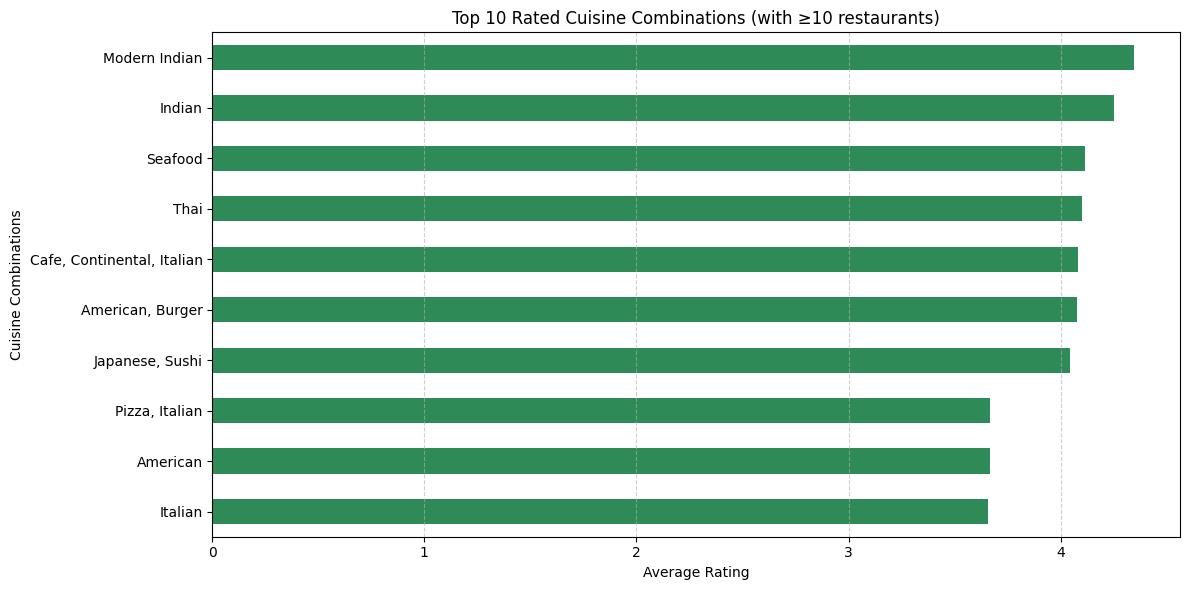

In [ ]:
# Cleaning the rating column
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Grouping by cuisine combinations and calculating average rating
cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean().dropna()

# To Get top 10 highest-rated combinations (with at least 10 restaurants to avoid outliers)
valid_combinations = df['Cuisines'].value_counts()
popular_combinations = valid_combinations[valid_combinations >= 10].index
top_rated_combinations = cuisine_rating[popular_combinations].sort_values(ascending=False).head(10)

# Displaying top-rated cuisine combinations
print("Top 10 Cuisine Combinations by Average Rating (min 10 restaurants):")
print(top_rated_combinations)

# Plot: Top-rated cuisine combinations
plt.figure(figsize=(12, 6))
top_rated_combinations.plot(kind='barh', color='seagreen')
plt.title('Top 10 Rated Cuisine Combinations (with ≥10 restaurants)')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Combinations')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
